In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

from imblearn.over_sampling import SMOTE, SVMSMOTE
from sklearn.base import BaseEstimator, TransformerMixin

from collections import Counter
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier 


from sklearn.metrics import confusion_matrix, RocCurveDisplay, roc_curve, auc , ConfusionMatrixDisplay, precision_score

import warnings
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')
#df = pd.read_csv('data/bank-additional.csv', sep = ';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
X = df.drop(columns = ['y'], axis = 1) # , 'duration'

In [7]:
y = df['y'].map({'yes': 1, 'no': 0})

In [8]:
# Step 1: Define numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

In [9]:
# Step 2: Create a ColumnTransformer for scaling and encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
    ]
)

In [10]:
# Fit and transform the features
X_processed = preprocessor.fit_transform(X)

### Solve imbalanced class by oversampling and creating synthetic data 

In [12]:
oversample = SMOTE()
X, y = oversample.fit_resample(X_processed,y)

print(Counter(y))

Counter({0: 36548, 1: 36548})


In [13]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
)

We use the metrics obtained for the best performing model using GridSearch in the other notebook, and apply it to the model and fit the dataset that's balanced after SMOTE. 

In [15]:
svc_model = SVC(
    kernel = 'rbf', #'linear',
    class_weight = 'balanced',
    C = 1, # best_params['classifier__C'],
    gamma = 'auto', # 0.1, #best_params['classifier__gamma'],
)

In [16]:
svc_model.fit(X_train, y_train)

SVC(C=1, class_weight='balanced', gamma='auto')

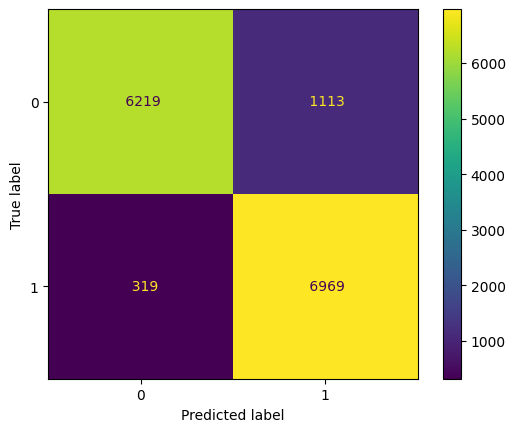

In [17]:
ConfusionMatrixDisplay.from_estimator(svc_model, X_test, y_test, values_format='5d')

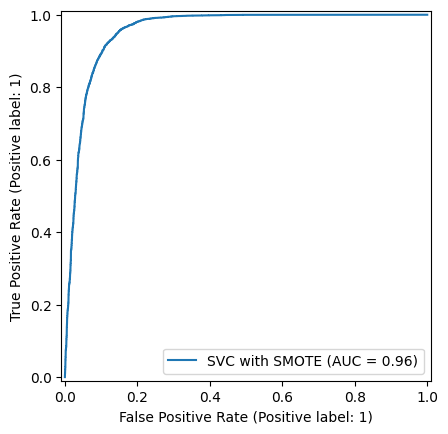

In [38]:
RocCurveDisplay.from_estimator(svc_model, X_test, y_test, name = 'SVC with SMOTE')

In [19]:
print(f'Precision Score is: {precision_score(y_test, svc_model.predict(X_test)):.2%}')

Precision Score is: 86.23%
